In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import random
import time 
import datetime as dt 
import os

# Summer2024-env/Scripts/activate

In [2]:
import seaborn as sns


In [3]:
# Url of weather data 

In [4]:
t = pd.read_csv("newWeatherData.csv")

In [5]:
t = t[5:len(t)-20]

In [6]:
t[:739].iloc[5]['time'].split("T")[1].split(":")[0]

'10'

In [7]:
t

,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³)
5,2021-01-01T05:00,9.0,99,6.5,0.4,0.4,0.0,0.0,1002.4,987.7,90,15.3,139,29.9,7.6,0.515
6,2021-01-01T06:00,8.6,97,5.1,0.0,0.0,0.0,0.0,1002.8,988.1,90,20.5,181,41.0,8.3,0.510
7,2021-01-01T07:00,6.2,95,2.1,0.0,0.0,0.0,0.0,1003.8,989.0,90,20.5,195,42.5,7.9,0.507
8,2021-01-01T08:00,5.5,94,1.4,0.0,0.0,0.0,0.0,1004.4,989.5,91,18.7,205,40.3,7.4,0.505
9,2021-01-01T09:00,4.9,92,0.7,0.0,0.0,0.0,0.0,1005.3,990.4,90,18.9,198,38.9,7.0,0.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30647,2024-06-30T23:00,35.8,39,39.0,0.0,0.0,0.0,0.0,1016.2,1002.6,5,3.3,354,14.4,34.9,0.282
30648,2024-07-01T00:00,35.1,41,38.6,0.0,0.0,0.0,0.0,1016.2,1002.6,5,2.3,39,10.4,34.5,0.282
30649,2024-07-01T01:00,31.5,65,36.8,0.0,0.0,0.0,0.0,1017.7,1003.9,34,5.4,82,13.3,33.1,0.295
30650,2024-07-01T02:00,30.4,69,35.6,0.0,0.0,0.0,0.0,1018.0,1004.1,32,6.6,103,10.4,32.0,0.295


In [8]:
def addWeatherHourColumn(data : pd.DataFrame) -> pd.DataFrame:

    data = data.reset_index(drop=True)

    data["hourTime"] = "0"

    # use datetime module 
    for index, row in data.iterrows():
        AMPM = "AM"
        hour = int(row['time'].split("T")[1].split(":")[0])

        if hour >12:
            AMPM = "PM"
            hour -=12
        
        # Note that there is no hour 24. After hour 23, it goes back to hour 0
        if hour == 12:
            AMPM = "PM"
        
        # 0 represents 12AM
        if hour == 0:
            hour = 12
            AMPM = "AM"


        data.loc[index,'hourTime'] = str(hour) + str(AMPM)

    return data

In [9]:
t

,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³)
5,2021-01-01T05:00,9.0,99,6.5,0.4,0.4,0.0,0.0,1002.4,987.7,90,15.3,139,29.9,7.6,0.515
6,2021-01-01T06:00,8.6,97,5.1,0.0,0.0,0.0,0.0,1002.8,988.1,90,20.5,181,41.0,8.3,0.510
7,2021-01-01T07:00,6.2,95,2.1,0.0,0.0,0.0,0.0,1003.8,989.0,90,20.5,195,42.5,7.9,0.507
8,2021-01-01T08:00,5.5,94,1.4,0.0,0.0,0.0,0.0,1004.4,989.5,91,18.7,205,40.3,7.4,0.505
9,2021-01-01T09:00,4.9,92,0.7,0.0,0.0,0.0,0.0,1005.3,990.4,90,18.9,198,38.9,7.0,0.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30647,2024-06-30T23:00,35.8,39,39.0,0.0,0.0,0.0,0.0,1016.2,1002.6,5,3.3,354,14.4,34.9,0.282
30648,2024-07-01T00:00,35.1,41,38.6,0.0,0.0,0.0,0.0,1016.2,1002.6,5,2.3,39,10.4,34.5,0.282
30649,2024-07-01T01:00,31.5,65,36.8,0.0,0.0,0.0,0.0,1017.7,1003.9,34,5.4,82,13.3,33.1,0.295
30650,2024-07-01T02:00,30.4,69,35.6,0.0,0.0,0.0,0.0,1018.0,1004.1,32,6.6,103,10.4,32.0,0.295


In [10]:
# Push to repo 

In [11]:
t= addWeatherHourColumn(t)

In [12]:
t

,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),hourTime
0,2021-01-01T05:00,9.0,99,6.5,0.4,0.4,0.0,0.0,1002.4,987.7,90,15.3,139,29.9,7.6,0.515,5AM
1,2021-01-01T06:00,8.6,97,5.1,0.0,0.0,0.0,0.0,1002.8,988.1,90,20.5,181,41.0,8.3,0.510,6AM
2,2021-01-01T07:00,6.2,95,2.1,0.0,0.0,0.0,0.0,1003.8,989.0,90,20.5,195,42.5,7.9,0.507,7AM
3,2021-01-01T08:00,5.5,94,1.4,0.0,0.0,0.0,0.0,1004.4,989.5,91,18.7,205,40.3,7.4,0.505,8AM
4,2021-01-01T09:00,4.9,92,0.7,0.0,0.0,0.0,0.0,1005.3,990.4,90,18.9,198,38.9,7.0,0.503,9AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30642,2024-06-30T23:00,35.8,39,39.0,0.0,0.0,0.0,0.0,1016.2,1002.6,5,3.3,354,14.4,34.9,0.282,11PM
30643,2024-07-01T00:00,35.1,41,38.6,0.0,0.0,0.0,0.0,1016.2,1002.6,5,2.3,39,10.4,34.5,0.282,12AM
30644,2024-07-01T01:00,31.5,65,36.8,0.0,0.0,0.0,0.0,1017.7,1003.9,34,5.4,82,13.3,33.1,0.295,1AM
30645,2024-07-01T02:00,30.4,69,35.6,0.0,0.0,0.0,0.0,1018.0,1004.1,32,6.6,103,10.4,32.0,0.295,2AM


In [13]:
def saveWeatherHourlyData(data : pd.DataFrame , path : str) -> pd.DataFrame:

    hours = list(data['hourTime'].unique())

    for hour in hours:
        PATH = "hourlyWeatherData/" + path + "/" "weather_data_" + str(hour) + ".csv"

        

        try:
            pd.read_pickle(PATH)
        except Exception as e:    
            data[data['hourTime'] == hour].reset_index(drop=True).to_pickle(PATH)

In [14]:
#saveWeatherHourlyData(t,"openMeteo")

In [15]:
t.head()

,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),hourTime
0,2021-01-01T05:00,9.0,99,6.5,0.4,0.4,0.0,0.0,1002.4,987.7,90,15.3,139,29.9,7.6,0.515,5AM
1,2021-01-01T06:00,8.6,97,5.1,0.0,0.0,0.0,0.0,1002.8,988.1,90,20.5,181,41.0,8.3,0.510,6AM
2,2021-01-01T07:00,6.2,95,2.1,0.0,0.0,0.0,0.0,1003.8,989.0,90,20.5,195,42.5,7.9,0.507,7AM
3,2021-01-01T08:00,5.5,94,1.4,0.0,0.0,0.0,0.0,1004.4,989.5,91,18.7,205,40.3,7.4,0.505,8AM
4,2021-01-01T09:00,4.9,92,0.7,0.0,0.0,0.0,0.0,1005.3,990.4,90,18.9,198,38.9,7.0,0.503,9AM


In [16]:
months = ["janurary","february", "march", "april", "may", "june", "july", "august", "september", "october", "november","december"]

years = ["2021","2022","2023","2024"]
'''weatherData = pd.DataFrame(columns=["Date","Max Temp","Min Temp","Mean Temp","Departure","HDD","CDD","Precipitation","New Snow",'Snow Depth'])
    
for year in years:
    for month in months:
        print(year ,month)
        
        try:
            weatherData = pd.concat([weatherData , pd.read_csv("weatherData/" +month + "_" + year + "_weather_data.csv")] )
        except Exception as e:
            print("Ended on " + month + " " + year)

        print("Len of dataset",len(weatherData))
        print()

            
'''

'weatherData = pd.DataFrame(columns=["Date","Max Temp","Min Temp","Mean Temp","Departure","HDD","CDD","Precipitation","New Snow",\'Snow Depth\'])\n    \nfor year in years:\n    for month in months:\n        print(year ,month)\n        \n        try:\n            weatherData = pd.concat([weatherData , pd.read_csv("weatherData/" +month + "_" + year + "_weather_data.csv")] )\n        except Exception as e:\n            print("Ended on " + month + " " + year)\n\n        print("Len of dataset",len(weatherData))\n        print()\n\n            \n'

In [17]:
# BIG TIME : 6 AM to 10 PM. Action is in the middle of the day 
# Hourly Weather DataSet (If it can be found ) or copy exact value for each of the 24 hours 
# Use hour as a feature for predictions so model can switch bettwen 
# Day of the week 
# Holidays (feature)

In [18]:
'''westernData = pd.DataFrame(columns=list(pd.read_csv("lmp_data/janurary_2021_lmp_data.csv").columns)) 
westIntData = pd.DataFrame(columns=list(pd.read_csv("lmp_data/janurary_2021_lmp_data.csv").columns))

for year in years:
    for month in months:
        print(year ,month)
        
        try:
            hold = pd.read_csv("lmp_data/" +month + "_" + year + "_lmp_data.csv")
            westIntData = pd.concat([westIntData , ( hold[hold['pnode_name'] == "WEST INT HUB"][::-1] )] )
            westernData = pd.concat([westernData , ( hold[hold['pnode_name'] == "WESTERN HUB"][::-1] )])
        except Exception as e:
            print(e)
            print("Ended on " + month + " " + year)
            break

        print("Len of westIntData",len(westIntData))
        print("Len of westernData",len(westernData))

        print()'''

'westernData = pd.DataFrame(columns=list(pd.read_csv("lmp_data/janurary_2021_lmp_data.csv").columns)) \nwestIntData = pd.DataFrame(columns=list(pd.read_csv("lmp_data/janurary_2021_lmp_data.csv").columns))\n\nfor year in years:\n    for month in months:\n        print(year ,month)\n        \n        try:\n            hold = pd.read_csv("lmp_data/" +month + "_" + year + "_lmp_data.csv")\n            westIntData = pd.concat([westIntData , ( hold[hold[\'pnode_name\'] == "WEST INT HUB"][::-1] )] )\n            westernData = pd.concat([westernData , ( hold[hold[\'pnode_name\'] == "WESTERN HUB"][::-1] )])\n        except Exception as e:\n            print(e)\n            print("Ended on " + month + " " + year)\n            break\n\n        print("Len of westIntData",len(westIntData))\n        print("Len of westernData",len(westernData))\n\n        print()'

In [19]:
#westIntData

In [20]:
#westernData.info()

In [21]:
'''## Dropping null columns 
westernData.drop(["voltage", "equipment", "zone"], axis=1, inplace=True)
westIntData.drop(["voltage", "equipment", "zone"], axis=1, inplace=True)

# There appears to be a 100% correlation between the pnode_id and pnode_name so I will drop the pnode_name. 
westIntData.drop(["pnode_name", "type", "pnode_id"], axis=1, inplace=True)
westernData.drop(["pnode_name", "type", "pnode_id"], axis=1, inplace=True)'''

'## Dropping null columns \nwesternData.drop(["voltage", "equipment", "zone"], axis=1, inplace=True)\nwestIntData.drop(["voltage", "equipment", "zone"], axis=1, inplace=True)\n\n# There appears to be a 100% correlation between the pnode_id and pnode_name so I will drop the pnode_name. \nwestIntData.drop(["pnode_name", "type", "pnode_id"], axis=1, inplace=True)\nwesternData.drop(["pnode_name", "type", "pnode_id"], axis=1, inplace=True)'

In [22]:
#westernData = westernData.reset_index(drop=True)

In [23]:
def addDaysColumn(data : pd.DataFrame) -> pd.DataFrame:

    data['currentDay'] = "0"
    data = data.reset_index(drop=True)
    
    # Janurary 1 2021 is a friday hence the mapping starts as friday equaling 1 and since indexes start at 0, thursday is 0
    savedDay = 1
    days = {
        1 : "friday",
        2: "saturday",
        3: "sunday",
        4: "monday",
        5: "tuesday",
        6: "wednesday",
        0: "thursday"
    }

    for index, row in data.iterrows():

        try:
            currentDay = int(row['datetime_beginning_ept'].split(" ")[0].split("/")[1]) % 7  # mod 7 to keep the days repeating
            data.loc[index,'currentDay'] = str(days[currentDay])
        except Exception as e:
            print(e)
            print(index)
            print(row)

    return data


In [24]:
def addHourColumn(data : pd.DataFrame) -> pd.DataFrame:

    data = data.reset_index(drop=True)

    data["hourTime"] = "0"

    # use datetime module 
    for index, row in data.iterrows():
        hour = row["datetime_beginning_utc"].split(" ")[1].split(":")[0]
        AMPM = row["datetime_beginning_utc"].split(" ")[2]

        data.loc[index,'hourTime'] = str(hour) + str(AMPM)

    return data

In [25]:
def saveHourlyData(data : pd.DataFrame , path : str) -> pd.DataFrame:

    hours = list(data['hourTime'].unique())

    for hour in hours:
        PATH = "hourlyLmpData/" + path + "/" "lmp_data_" + str(hour) + ".csv"

        

        try:
            pd.read_pickle(PATH)
        except Exception as e:    
            addDaysColumn(data)[data['hourTime'] == hour].reset_index(drop=True).to_pickle(PATH)

In [26]:
#saveHourlyData(addHourColumn(westernData), path="westernData")
#saveHourlyData(addHourColumn(westIntData), path="westIntData")

In [27]:
#addDaysColumn(westernData)

In [28]:
# Add holidays feature


In [29]:
'''
New Year's Day: January 1
Juneteenth: June 19
Independence Day: July 4
Veterans Day: November 11
Christmas Day: December 25

Martin Luther King Jr. Day: Third Monday in January
Presidents' Day: Third Monday in February
Memorial Day: Last Monday in May
Labor Day: First Monday in September
Columbus Day: Second Monday in October
Thanksgiving Day: Fourth Thursday of November
'''



"\nNew Year's Day: January 1\nJuneteenth: June 19\nIndependence Day: July 4\nVeterans Day: November 11\nChristmas Day: December 25\n\nMartin Luther King Jr. Day: Third Monday in January\nPresidents' Day: Third Monday in February\nMemorial Day: Last Monday in May\nLabor Day: First Monday in September\nColumbus Day: Second Monday in October\nThanksgiving Day: Fourth Thursday of November\n"

In [30]:
def applyHoliday(data : pd.DataFrame, holiday: list[dict]) -> None:

    mapping = {
        1:"monday",
        2:"tueday",
        3:"wednesday",
        4:"thursday",
        5:"friday",
        6:"saturday",
        7:"sunday",

    }

    data = data.reset_index(drop=True)

    data['isHoliday'] = 0 # 0 for not holiday, 1 for is holiday

    for item in holiday:
        month = item['month']
        day = item['date']
        occurence = item['occurence']
        startYear = item['startYear']
        
        
        # occurence refers to when the day occurs. Ex is it the first monday occurence of the month or the second monday occurence of the month 
        occurence_match = 1 




        for index, row in data.iterrows():
            current_month = int(row["datetime_beginning_utc"].split(" ")[0].split("/")[0])
            current_day = int(row["datetime_beginning_utc"].split(" ")[0].split("/")[1])
            current_year = int(row["datetime_beginning_utc"].split(" ")[0].split("/")[2])


            if current_month == month and startYear <= current_year:


                try:
                    day = int(day)
                    if current_day == day:
                        data.loc[index, "isHoliday"] = 1
                                    
                except Exception as e:
                    
                    if mapping[dt.datetime(current_year, current_month, current_day).isocalendar().weekday] == str(day):
                        if occurence_match == occurence:
                        # Assign this date as the location
                            data.loc[index, "isHoliday"] = 1
                            occurence_match=1
                        else:
                            occurence +=1

    return data




In [31]:
holidays = [
    {
        "holiday_name": "New Year's Day",
        "month": 1,
        "date" : 1,
        "occurence": 1,
        "startYear": 1870, # When it was recognized as a US federal holiday

    },
    {
        "holiday_name": "Juneteenth", # Only applicable after 2022 
        "month": 6,
        "date" : 19,
        "occurence": 1,
        "startYear":2021,
        

    },
    {
        "holiday_name": "Independence Day",
        "month": 7,
        "date" : 4,
        "occurence": 1,
        "startYear": 1870,

    },
    {
        "holiday_name": "Veterans Day",
        "month": 11,
        "date" : 11,
        "occurence": 1,
        "startYear": 1954,

    },
    {
        "holiday_name": "Christmas Day",
        "month": 12,
        "date" : 25,
        "occurence": 1, 
        "startYear": 1870,

    },
    {
        "holiday_name": "Martin Luther King Jr",
        "month": 1,
        "date" : "monday",
        "occurence": 3,# Third monday in janurary
        "startYear":1986,

    },
    {
        "holiday_name": "Memorial Day",
        "month": 2,
        "date" : "february",
        "occurence": 5, # Last monday of the month, could be 5 or 6 idk 
        "startYear": 1971,

    },
    {
        "holiday_name": "Labor Day",
        "month": 9,
        "date" : "monday",
        "occurence": 1,
        "startYear": 1894,

    },
    {
        "holiday_name": "Columbus Day",
        "month": 10,
        "date" : "monday",
        "occurence": 2,
        "startYear":1937,

    },
    {
        "holiday_name": "Thanksgiving Day",
        "month": 11,
        "date" : "thursday",
        "occurence": 4,
        "startYear":1870,

    }

]

In [32]:
def combineDataFrames(lmpData : pd.DataFrame, weatherData: pd.DataFrame) -> pd.DataFrame:
    
    combinedData = pd.DataFrame(columns=list(lmpData.columns )+ list(weatherData.columns))
    lmpData = lmpData.reset_index(drop=True)
    weatherData = weatherData.reset_index(drop=True)

    for index, lmpRow in lmpData.iterrows():
        weatherRow = weatherData.iloc[index]

        lmpYear = int(lmpRow['datetime_beginning_utc'].split(" ")[0].split("/")[2])
        lmpMonth = int(lmpRow['datetime_beginning_utc'].split(" ")[0].split("/")[0])
        lmpDay = int(lmpRow['datetime_beginning_utc'].split(" ")[0].split("/")[1])

        weatherYear = int(weatherRow['time'].split("T")[0].split("-")[0])
        weatherMonth = int(weatherRow ['time'].split("T")[0].split("-")[1])
        weatherDay = int(weatherRow ['time'].split("T")[0].split("-")[2])


        # IF CONDITIONS MET ****

        if lmpYear == weatherYear and lmpMonth == weatherMonth and lmpDay == weatherDay:

            currentCombination = pd.DataFrame([pd.concat([lmpRow.drop(['hourTime']),weatherRow],axis=0)], columns=list(lmpRow.index) + list(weatherRow.index))

            combinedData = pd.concat([combinedData, currentCombination], axis=0)

        else:
            print(f"The Index: {index}\nWeather Data: Year: {weatherYear}, Month: {weatherMonth}, Day: {weatherDay}\nLmp Data: Year: {lmpYear}, Month: {lmpMonth}, Day: {lmpDay}")
            break
    

    return combinedData



        


In [33]:
def total_lmp_delta(data : pd.DataFrame) -> None: 
    data['total_lmp_delta']  = 0
    for  i in list(data.index):
        data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]

In [34]:
def addTarget(df : pd.DataFrame)->None:
    num = len(df['total_lmp_da'])
    top_5_percent_index = num * 0.95
    bottom_95_percent_index = num * 0.05

    min_5 = sorted(df['total_lmp_delta'])[:int(bottom_95_percent_index)][-1]
    max_5 = sorted(df['total_lmp_delta'])[int(top_5_percent_index):][0]

    df['target_c'] = 0

    # Can also just classify outliers as 1, instead of separating into positive and negative
    for i in list(reversed(df.index)):

        if df['total_lmp_delta'][i] <= min_5:
            df.loc[i,'target_c'] = 2
        elif df['total_lmp_delta'][i] >= max_5:
            df.loc[i,'target_c'] = 1
        else: 
            df.loc[i,'target_c'] = 0

    df['target_c'] = df['target_c'].shift(-1)
    df['target_r'] = df['total_lmp_delta'].shift(-1)
    df.dropna(inplace=True)

In [35]:
# Do 8AM and 8PM

In [36]:
6/13/2022

0.00022825838849577722

In [37]:
12/24/2022 

0.0002472799208704253

In [38]:
com = pd.read_pickle("hourlyLmpData/westernData/lmp_data_8PM.csv")
for index, row in com.iterrows():
    if row['total_lmp_da'] - row['total_lmp_rt'] < -1000:
        print(f"{index}\n{row}")

528
datetime_beginning_utc    6/13/2022 8:00:00 PM
datetime_beginning_ept    6/13/2022 4:00:00 PM
system_energy_price_rt             2639.714167
total_lmp_rt                       2859.105678
congestion_price_rt                  194.01302
marginal_loss_price_rt               25.378491
system_energy_price_da                  166.01
total_lmp_da                        172.632379
congestion_price_da                   7.990823
marginal_loss_price_da               -1.368444
hourTime                                   8PM
currentDay                           wednesday
Name: 528, dtype: object


In [39]:
total_lmp_delta(com)
addTarget(com)
com[["datetime_beginning_utc","total_lmp_delta","target_r"]]

C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\2996727238.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9712759999999996' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]


,datetime_beginning_utc,total_lmp_delta,target_r
0,1/1/2021 8:00:00 PM,-2.971276,0.263064
1,1/2/2021 8:00:00 PM,0.263064,-3.217605
2,1/3/2021 8:00:00 PM,-3.217605,-2.214399
3,1/4/2021 8:00:00 PM,-2.214399,0.967639
4,1/5/2021 8:00:00 PM,0.967639,1.968827
...,...,...,...
1271,6/25/2024 8:00:00 PM,12.227201,-3.859776
1272,6/26/2024 8:00:00 PM,-3.859776,4.319940
1273,6/27/2024 8:00:00 PM,4.319940,2.751064
1274,6/28/2024 8:00:00 PM,2.751064,-86.815531


In [40]:
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Add confusion matrix to results 
from sklearn.metrics import confusion_matrix, mean_squared_error

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [43]:
def plotLmpData():
    PATH = "hourlyLmpData/westernData"
    lmpDirs = os.listdir(PATH)
    num = len(lmpDirs)
    row = 6
    col = 4
    f, axs = plt.subplots(2,2,figsize=(30,30))
    for index in range(1,num+1,1):
        dir = lmpDirs[index-1]

        lmpData = pd.read_pickle(PATH + "/" + dir)

        dataTime = dir.split("_")[2]

        plt.subplot(row, col, index)
        plt.plot(lmpData['total_lmp_da'] - lmpData['total_lmp_rt'])
        plt.xlabel("Day")
        plt.ylabel("Lmp Delta")
        plt.title(f"LMP DELTA AT {dataTime}")

        
    
    plt.show()

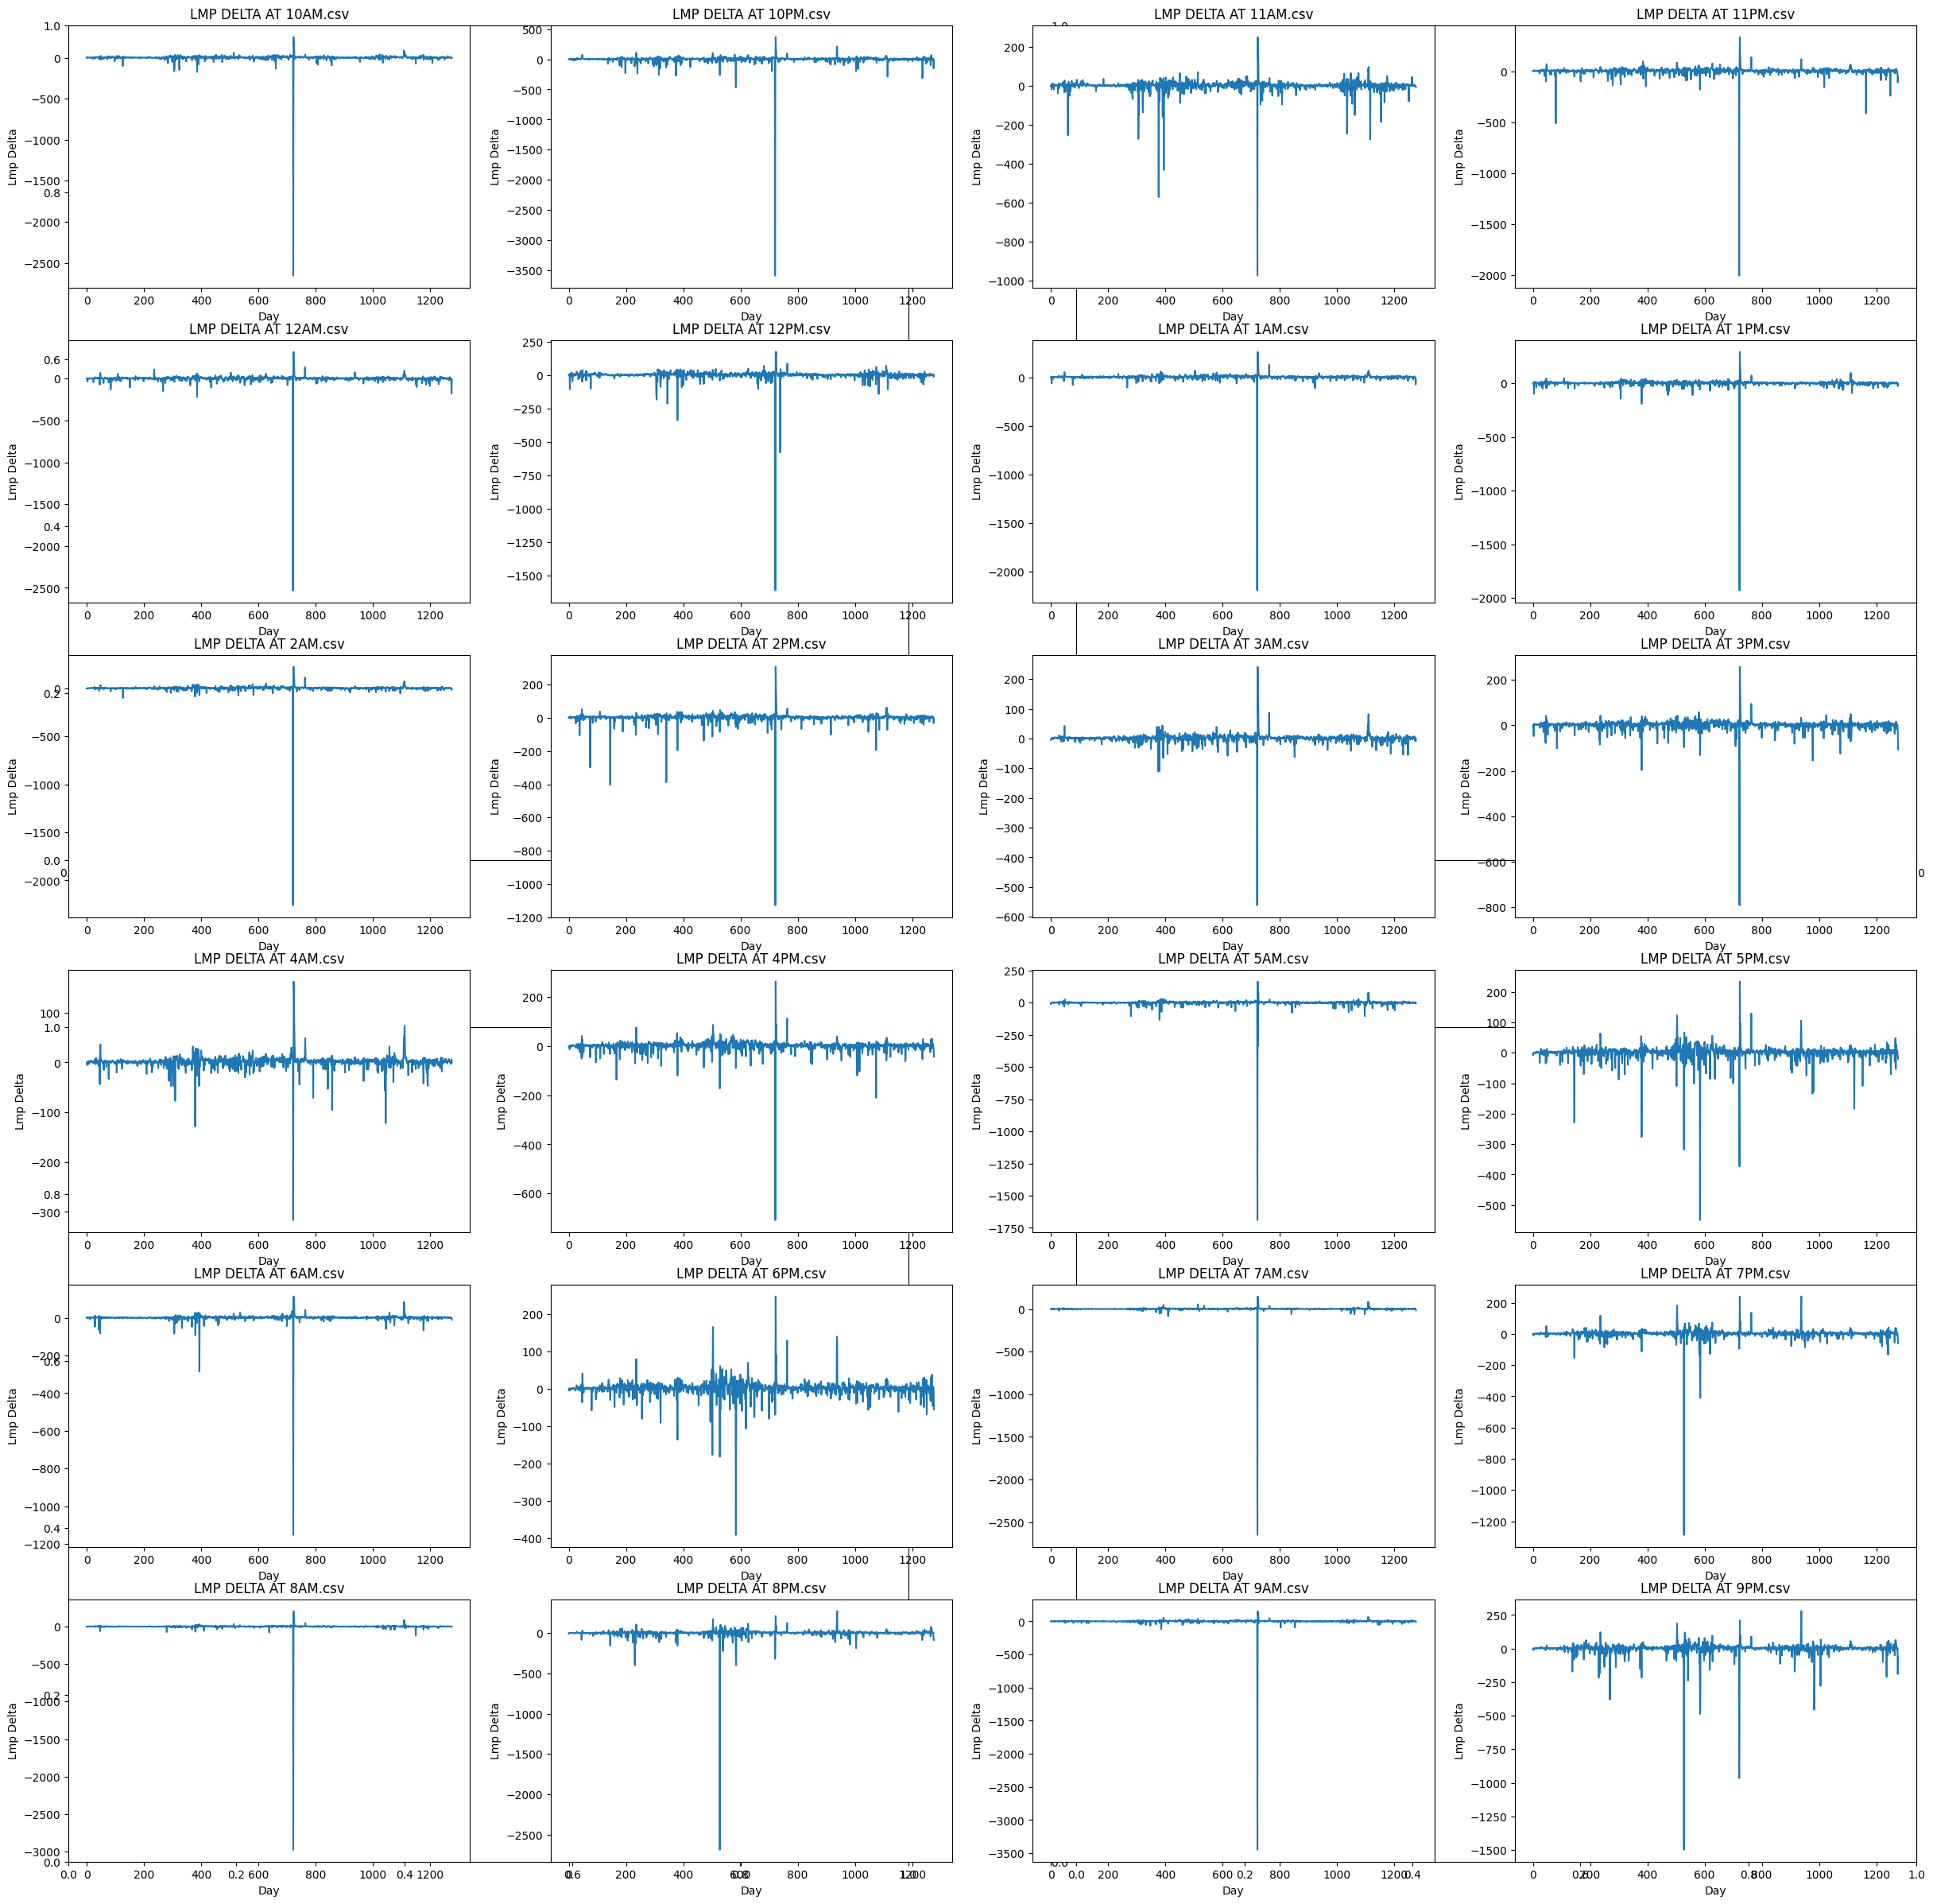

In [44]:
plotLmpData()

In [45]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.16.2


In [46]:
#'lmp_data_10AM.csv
def trainingResults(LMP_PATH : str, WEATHER_PATH : str,c_models: list, r_models : list) -> dict:
    results = {}

    for items in os.listdir(LMP_PATH):
        lmp = pd.read_pickle(LMP_PATH + "/" + items)

        hold = items.split("_")
        hold[0] = "weather"

        dataTime = hold[2]

        hold = "_".join(hold)

        # Results time
        results[dataTime] = {}



        weather = pd.read_pickle(WEATHER_PATH + "/" + hold)


        com = combineDataFrames(lmp, weather)
        
        
        applyHoliday(com, holidays)
        total_lmp_delta(com)
        addTarget(com)

        
 
        inputs = (com.describe().columns[:-2])
        outputs = (com.describe().columns[-2:])

        scaler = StandardScaler()
        scaler.fit(com[inputs])
        X = scaler.transform(com[inputs])


        X_train, X_test, y_train, y_test = train_test_split(X,com[outputs]["target_c"],test_size=0.2, shuffle=False)
        X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, com[outputs]['target_r'], test_size=0.2, shuffle=False)


        print(f"\n************************** DATE : {dataTime} **************************\n")
        print("***CLASSIFICATION***\n")
        for model in c_models:
            
            print(f"{str(model)}")
            results[dataTime][str(model)] = {}

            model.fit(X_train, y_train)

            trainResult = model.score(X_train,y_train)
            testResult = model.score(X_test,y_test)
            confusionMatrix = confusion_matrix(y_test, model.predict(X_test))

            print("Training", trainResult)
            print("Testing: ",testResult)
            print()
            print(confusionMatrix)
            print()

            results[dataTime][str(model)]["training"] =  trainResult
            results[dataTime][str(model)]["testing"] = testResult
            results[dataTime][str(model)]["confusion_matrix"] = confusionMatrix

        
        print("\n***REGRESSION***\n")
        for model in r_models:
            print(f"{str(model)}")
            results[dataTime][str(model)] = {}

            model.fit(X_train_r, y_train_r)
            
            trainResult = model.score(X_train,y_train)
            testResult = model.score(X_test,y_test)
            meanSqauredError = mean_squared_error(y_test_r, model.predict(X_test_r))

            print("Training",trainResult)
            print("Testing",testResult)
            print()
            print(meanSqauredError)
            print()

            results[dataTime][str(model)]["training"] =  trainResult
            results[dataTime][str(model)]["testing"] = testResult
            results[dataTime][str(model)]["meanSqauredError"] = meanSqauredError
        

        print("\n***Neural Network***\n")
        model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=X_train.shape[0],output_dim=64),
        tf.keras.layers.LSTM(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='relu'),
        #tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(3) # 0, 1, 2 
        ])

        results[dataTime]["NeuralNetwork"] = {}

        loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


        model.compile(optimizer='adam',
                    loss=loss_fn,
                    metrics=['accuracy'],
                    )

        print(model)

        history = model.fit(X_train, y_train, epochs=50, verbose=0)
        test_results = model.evaluate(X_test, y_test, verbose=2)
        print(f"accuracy: {test_results[1]} - loss: {test_results[0]}")

        results[dataTime]["NeuralNetwork"]["loss"] =  test_results[0]
        results[dataTime]["NeuralNetwork"]["testing"] = test_results[1]



    return results

        







        



In [47]:
'''
Neg: Negative: 0 : Not an outlier
Neu: Neutral : 1 : Postive outlier
Pos: Positive : 2 : Negatve outlier 

                    Predicted
                Neg     Neu     Pos
                
        Neg    NegNeg  NegNeu  NegPos
Actual  Neu    NeuNeg  NeuNeu  NeuPos
        Pos    PosNeg  PosNeu  PosPos

        

        # 
'''

'\nNeg: Negative: 0 : Not an outlier\nNeu: Neutral : 1 : Postive outlier\nPos: Positive : 2 : Negatve outlier \n\n                    Predicted\n                Neg     Neu     Pos\n                \n        Neg    NegNeg  NegNeu  NegPos\nActual  Neu    NeuNeg  NeuNeu  NeuPos\n        Pos    PosNeg  PosNeu  PosPos\n\n        \n\n        # \n'

In [48]:
'''result = trainingResults("hourlyLmpData/westernData", "hourlyWeatherData/openMeteo",
 [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier(n_neighbors=3)],
 []#Ridge(), SVR(), DecisionTreeRegressor(), LinearRegression(), RandomForestRegressor()]# 
 ) '''

'result = trainingResults("hourlyLmpData/westernData", "hourlyWeatherData/openMeteo",\n [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier(n_neighbors=3)],\n []#Ridge(), SVR(), DecisionTreeRegressor(), LinearRegression(), RandomForestRegressor()]# \n ) '

In [49]:
# One page summary of results
# Put it on github 


In [50]:
def bestTestResult(result : dict) -> None:
    hours = [hour for hour in result]
    models = [model for model in result[hours[0]]]


    bestResults = {
        "max_test_acc": 0,
        "max_test_confusion_matrix": 0,
        "min_loss": 2,
        "best_model": "",
        "best_hour": "",
    }

    for hour in hours:

        for model in models:

            if result[hour][model].get("testing") and result[hour][model].get("testing") > bestResults["max_test_acc"]:
                bestResults["max_test_acc"] = result[hour][model].get("testing")
                bestResults["best_hour"] = hour
                bestResults["best_model"] = model


                # Check for matrix. If not matrix, then either means squared error or loss
                if result[hour][model].get("confusion_matrix") is not None:
                    bestResults['max_test_confusion_matrix'] = result[hour][model]['confusion_matrix']
                
                if result[hour][model].get("loss"):
                    bestResults['min_loss'] = result[hour][model]['loss']
                else:
                    bestResults['min_loss'] = ""
    

    return bestResults



In [66]:
def loadDataByHour(hour : str) -> pd.DataFrame:

    lmpPath = f"hourlyLmpData/westernData/lmp_data_{hour}.csv"
    weatherPath = f"hourlyWeatherData/openMeteo/weather_data_{hour}.csv"

    lmp = pd.read_pickle(lmpPath)
    weather = pd.read_pickle(weatherPath)


    com = combineDataFrames(lmp, weather)
    
    
    applyHoliday(com, holidays)
    total_lmp_delta(com)
    addTarget(com)

    return com

In [52]:
# 90% of data is not an outlier 
# 90% acc == 0%
# 95% acc = 50%
# 96% acc = 60%

# 97-98% = 70%-80%

In [54]:
# why regression worse than classification
# Why discrepancy between real time and day ahead (did they not know ahead)
# Regulation might have changed due to a cap (potential 1000)


In [55]:
X_train, X_test, y_train, y_test = loadDataByHour("8PM")

C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\3077604990.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combinedData = pd.concat([combinedData, currentCombination], axis=0)
C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\2996727238.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9712759999999996' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]


In [56]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [57]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression: default params is best 
# SVC : Default params but (C=0.01)
# RandomForestClassifier: {'criterion': 'log_loss', 'min_samples_leaf': 8, 'n_estimators': 10}
# Neural Network : Embedding, LSTM(128), Dropout(0.2), Dense(10), Dropout(0.2), Dense(3)
# xgboostClassifier: params = {'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8}

# LogisticRegression, RandomForestClassifier, SVC, NeuralNetwork,
# KNeighborsClassifier, Xgboost, LightGBM, 

<Sequential name=sequential, built=False>


In [59]:
"""
xgbParams : params = {
'min_child_weight': [1, 5, 10],
'gamma': [0.5, 1, 1.5, 2, 5],
'subsample': [0.6, 0.8, 1.0],
'colsample_bytree': [0.6, 0.8, 1.0],
'max_depth': [3, 4, 5]
}

lightBGM params : 
param_grid = {
"num_leaves": [31, 63, 127],
"max_depth": [-1, 3, 5],
"subsample": [0.8, 1.0],
"colsample_bytree": [0.8, 1.0]
}

logReg params : params = {
    "penalty":["l2"],   
    "C":[0.001,0.01,0.1,1,10,100],
    "class_weight":[None, "balanced"],
    "solver":["newton-cg","lbfgs","liblinear","sag","saga"],
    "max_iter":[100,400,1000]
}
"""

'\nxgbParams : params = {\n\'min_child_weight\': [1, 5, 10],\n\'gamma\': [0.5, 1, 1.5, 2, 5],\n\'subsample\': [0.6, 0.8, 1.0],\n\'colsample_bytree\': [0.6, 0.8, 1.0],\n\'max_depth\': [3, 4, 5]\n}\n\nlightBGM params : \nparam_grid = {\n"num_leaves": [31, 63, 127],\n"max_depth": [-1, 3, 5],\n"subsample": [0.8, 1.0],\n"colsample_bytree": [0.8, 1.0]\n}\n\nlogReg params : params = {\n    "penalty":["l2"],   \n    "C":[0.001,0.01,0.1,1,10,100],\n    "class_weight":[None, "balanced"],\n    "solver":["newton-cg","lbfgs","liblinear","sag","saga"],\n    "max_iter":[100,400,1000]\n}\n'

In [61]:
from sklearn.inspection import permutation_importance

In [75]:
com = loadDataByHour("8PM")


inputs = (com.describe().columns[:-2])
outputs = (com.describe().columns[-2:])

C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\3077604990.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combinedData = pd.concat([combinedData, currentCombination], axis=0)
C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\2996727238.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9712759999999996' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]


In [67]:
def plot_features(model, model_params = None) ->list:

    com = loadDataByHour("8PM")


    inputs = (com.describe().columns[:-2])
    outputs = (com.describe().columns[-2:])


    model.fit(X_train,y_train)

    r = permutation_importance(model, X_train, y_train, n_repeats=1, random_state=42)

    features = []
    values = []

    for i in r.importances_mean.argsort()[::-1]:
        print(f"{inputs[i]:<30} importance: {r.importances_mean[i]:.5f} +/- {r.importances_std[i]:.5f}" )
        features.append(inputs[i])
        values.append(r.importances_mean[i])


    fig, ax = plt.subplots()

    fig.set_figheight(12)
    fig.set_figwidth(16)
    y_pos = np.arange(len(features))

    ax.barh(y_pos,values,align="center",color ='maroon')
    ax.set_yticks(y_pos,labels=features)
    ax.invert_yaxis() 

    ax.set_xlabel("Features")
    ax.set_ylabel("Feture Importance")
    ax.set_title("Importance of Features on target")
    plt.show()

    return  dict(zip(features, values))

C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\3077604990.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combinedData = pd.concat([combinedData, currentCombination], axis=0)
C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\2996727238.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9712759999999996' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]


system_energy_price_da         importance: 0.02549 +/- 0.00000
total_lmp_delta                importance: 0.02157 +/- 0.00000
total_lmp_da                   importance: 0.01373 +/- 0.00000
apparent_temperature (°C)      importance: 0.01275 +/- 0.00000
congestion_price_da            importance: 0.01275 +/- 0.00000
congestion_price_rt            importance: 0.01176 +/- 0.00000
total_lmp_rt                   importance: 0.01078 +/- 0.00000
system_energy_price_rt         importance: 0.01078 +/- 0.00000
soil_temperature_0_to_7cm (°C) importance: 0.01078 +/- 0.00000
temperature_2m (°C)            importance: 0.00980 +/- 0.00000
soil_moisture_0_to_7cm (m³/m³) importance: 0.00784 +/- 0.00000
pressure_msl (hPa)             importance: 0.00686 +/- 0.00000
marginal_loss_price_da         importance: 0.00588 +/- 0.00000
wind_gusts_10m (km/h)          importance: 0.00490 +/- 0.00000
surface_pressure (hPa)         importance: 0.00294 +/- 0.00000
wind_speed_10m (km/h)          importance: 0.00294 +/- 

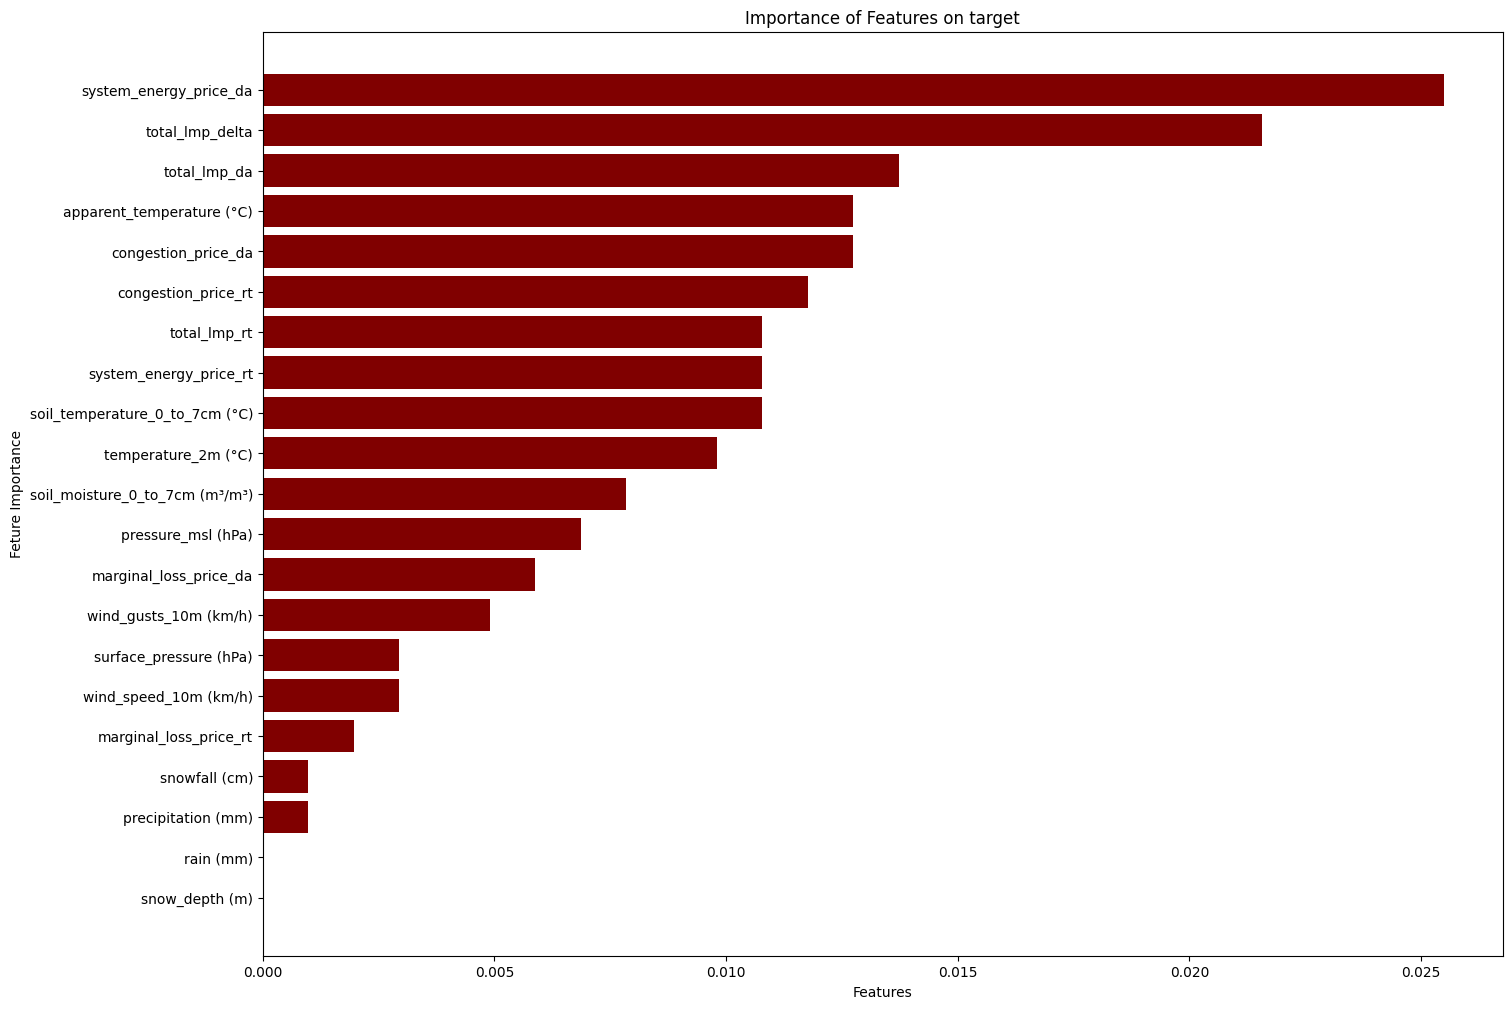

In [68]:
rlf_features = plot_features(RandomForestClassifier())

In [69]:
rlf_features = [i for i in list(rlf_features.keys()) if rlf_features[i] > 0]


scaler = StandardScaler()
scaler.fit(com[rlf_features])
X = scaler.transform(com[rlf_features])


X_train, X_test, y_train, y_test = train_test_split(X,com[outputs]["target_c"],test_size=0.2, shuffle=False)

rlf_params ={'criterion': 'log_loss', 'min_samples_leaf': 8, 'n_estimators': 10}

rlf = RandomForestClassifier(**params)

rlf.fit(X_train,y_train)

trainResult = rlf.score(X_train,y_train)
testResult = rlf.score(X_test,y_test)
confusionMatrix = confusion_matrix(y_test, rlf.predict(X_test))

print("Training", trainResult)
print("Testing: ",testResult)
print()
print(confusionMatrix)

C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\3077604990.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combinedData = pd.concat([combinedData, currentCombination], axis=0)
C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\2996727238.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9712759999999996' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]


C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\3077604990.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combinedData = pd.concat([combinedData, currentCombination], axis=0)
C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\2996727238.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9712759999999996' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]


temperature_2m (°C)            importance: 0.01667 +/- 0.00000
apparent_temperature (°C)      importance: 0.00980 +/- 0.00000
snow_depth (m)                 importance: 0.00882 +/- 0.00000
congestion_price_rt            importance: 0.00392 +/- 0.00000
marginal_loss_price_da         importance: 0.00392 +/- 0.00000
system_energy_price_rt         importance: 0.00392 +/- 0.00000
pressure_msl (hPa)             importance: 0.00294 +/- 0.00000
congestion_price_da            importance: 0.00294 +/- 0.00000
marginal_loss_price_rt         importance: 0.00294 +/- 0.00000
rain (mm)                      importance: 0.00196 +/- 0.00000
snowfall (cm)                  importance: 0.00098 +/- 0.00000
precipitation (mm)             importance: 0.00098 +/- 0.00000
surface_pressure (hPa)         importance: 0.00098 +/- 0.00000
total_lmp_da                   importance: 0.00098 +/- 0.00000
system_energy_price_da         importance: 0.00098 +/- 0.00000
total_lmp_rt                   importance: 0.00098 +/- 

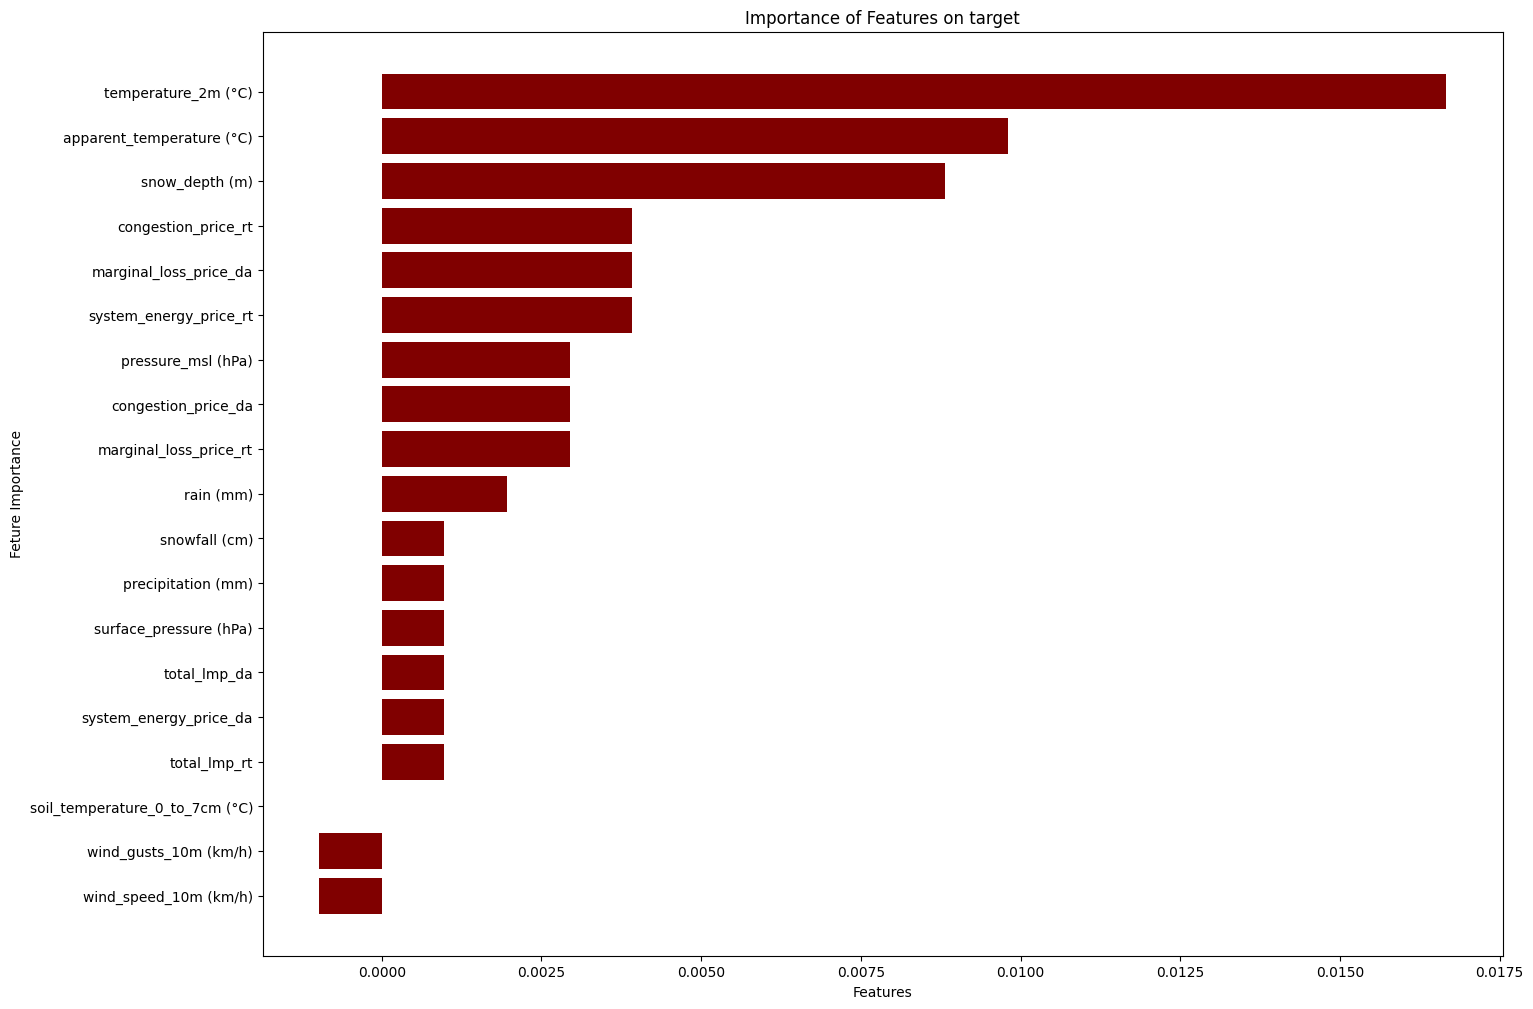

In [76]:
log_features = plot_features(LogisticRegression())

In [81]:
log_features = [i for i in list(log_features.keys()) if log_features[i] > 0]


scaler = StandardScaler()
scaler.fit(com[log_features])
X = scaler.transform(com[log_features])


X_train, X_test, y_train, y_test = train_test_split(X,com[outputs]["target_c"],test_size=0.2, shuffle=False)


rlf = LogisticRegression()

rlf.fit(X_train,y_train)

trainResult = rlf.score(X_train,y_train)
testResult = rlf.score(X_test,y_test)
confusionMatrix = confusion_matrix(y_test, rlf.predict(X_test))

print("Training", trainResult)
print("Testing: ",testResult)
print()
print(confusionMatrix)

Training 0.8921568627450981
Testing:  0.95703125

[[245   0   0]
 [  5   0   0]
 [  6   0   0]]


C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\3077604990.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combinedData = pd.concat([combinedData, currentCombination], axis=0)
C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\2996727238.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9712759999999996' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]


pressure_msl (hPa)             importance: 0.01373 +/- 0.00000
snow_depth (m)                 importance: 0.01275 +/- 0.00000
temperature_2m (°C)            importance: 0.00980 +/- 0.00000
system_energy_price_da         importance: 0.00882 +/- 0.00000
surface_pressure (hPa)         importance: 0.00784 +/- 0.00000
total_lmp_da                   importance: 0.00784 +/- 0.00000
total_lmp_rt                   importance: 0.00588 +/- 0.00000
marginal_loss_price_rt         importance: 0.00490 +/- 0.00000
system_energy_price_rt         importance: 0.00490 +/- 0.00000
snowfall (cm)                  importance: 0.00392 +/- 0.00000
marginal_loss_price_da         importance: 0.00294 +/- 0.00000
congestion_price_da            importance: 0.00196 +/- 0.00000
precipitation (mm)             importance: 0.00098 +/- 0.00000
rain (mm)                      importance: 0.00000 +/- 0.00000
apparent_temperature (°C)      importance: 0.00000 +/- 0.00000
congestion_price_rt            importance: 0.00000 +/- 

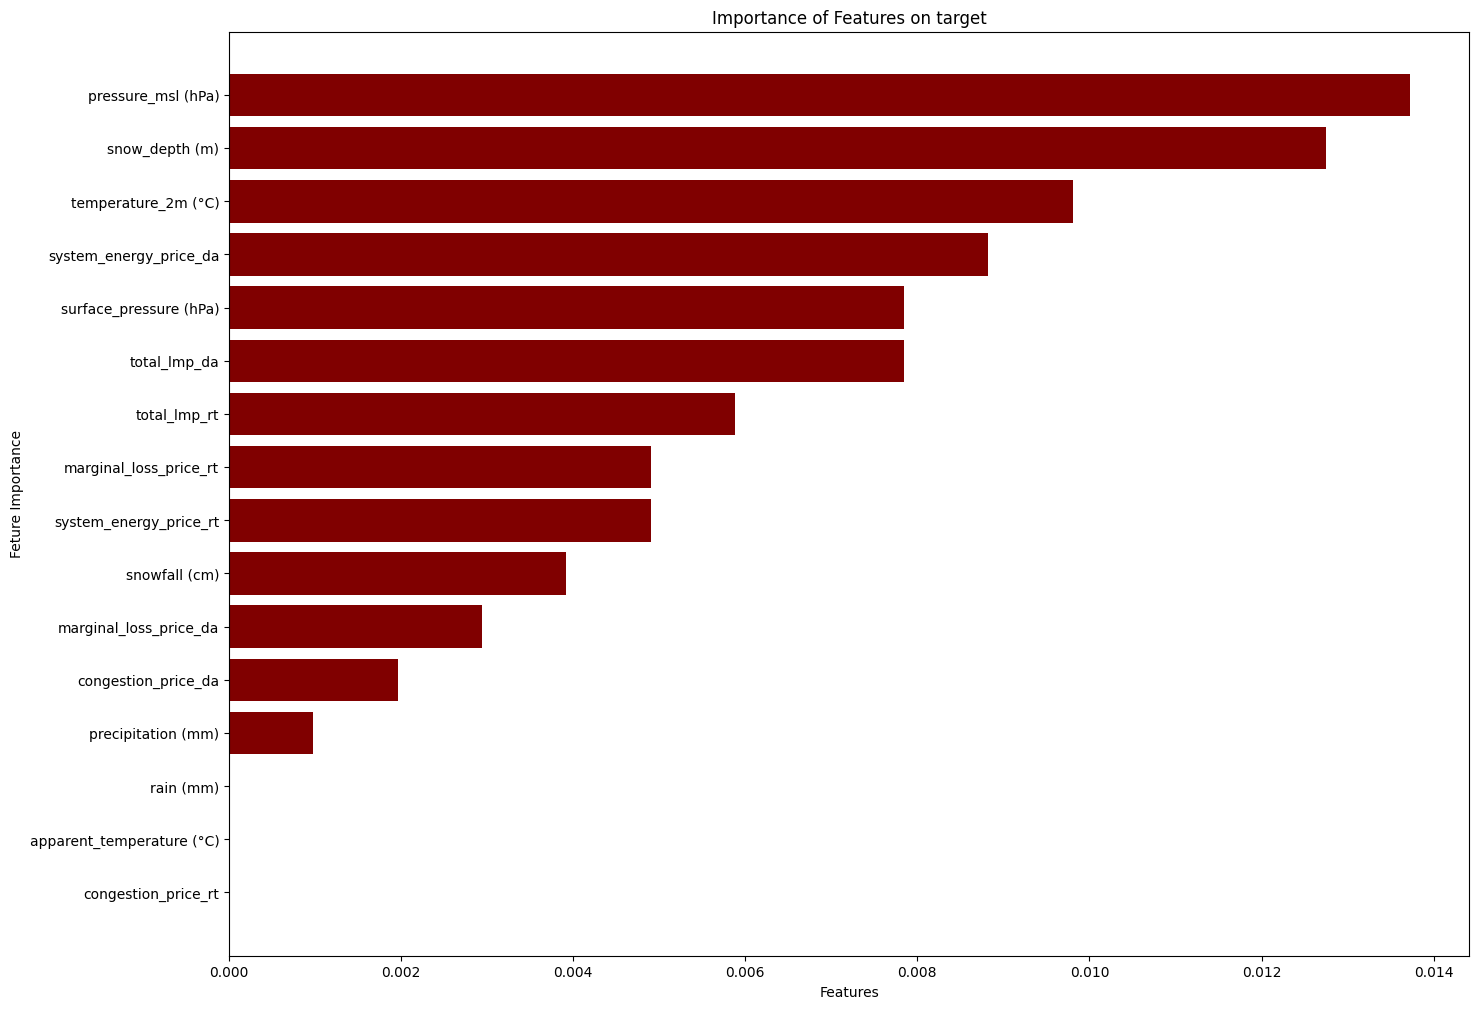

In [78]:
svc_features = plot_features(SVC())

In [116]:
svc_features = [i for i in list(svc_features.keys()) if svc_features[i] > 0]


scaler = StandardScaler()
scaler.fit(com[svc_features])
X = scaler.transform(com[svc_features])


X_train, X_test, y_train, y_test = train_test_split(X,com[outputs]["target_c"],test_size=0.2, shuffle=False)


rlf = SVC(C=0.01)

rlf.fit(X_train,y_train)

trainResult = rlf.score(X_train,y_train)
testResult = rlf.score(X_test,y_test)
confusionMatrix = confusion_matrix(y_test, rlf.predict(X_test))

print("Training", trainResult)
print("Testing: ",testResult)
print()
print(confusionMatrix)

Training 0.8862745098039215
Testing:  0.95703125

[[245   0   0]
 [  5   0   0]
 [  6   0   0]]


C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\3077604990.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combinedData = pd.concat([combinedData, currentCombination], axis=0)
C:\Users\ekkoi\AppData\Local\Temp\ipykernel_3800\2996727238.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9712759999999996' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]


snow_depth (m)                 importance: 0.05882 +/- 0.00000
pressure_msl (hPa)             importance: 0.03922 +/- 0.00000
marginal_loss_price_rt         importance: 0.01373 +/- 0.00000
total_lmp_da                   importance: 0.01176 +/- 0.00000
total_lmp_rt                   importance: 0.00980 +/- 0.00000
marginal_loss_price_da         importance: 0.00882 +/- 0.00000
system_energy_price_da         importance: 0.00784 +/- 0.00000
temperature_2m (°C)            importance: 0.00686 +/- 0.00000
surface_pressure (hPa)         importance: 0.00392 +/- 0.00000
congestion_price_da            importance: 0.00196 +/- 0.00000
system_energy_price_rt         importance: 0.00196 +/- 0.00000
snowfall (cm)                  importance: 0.00098 +/- 0.00000
rain (mm)                      importance: 0.00000 +/- 0.00000
precipitation (mm)             importance: 0.00000 +/- 0.00000
apparent_temperature (°C)      importance: 0.00000 +/- 0.00000
congestion_price_rt            importance: 0.00000 +/- 

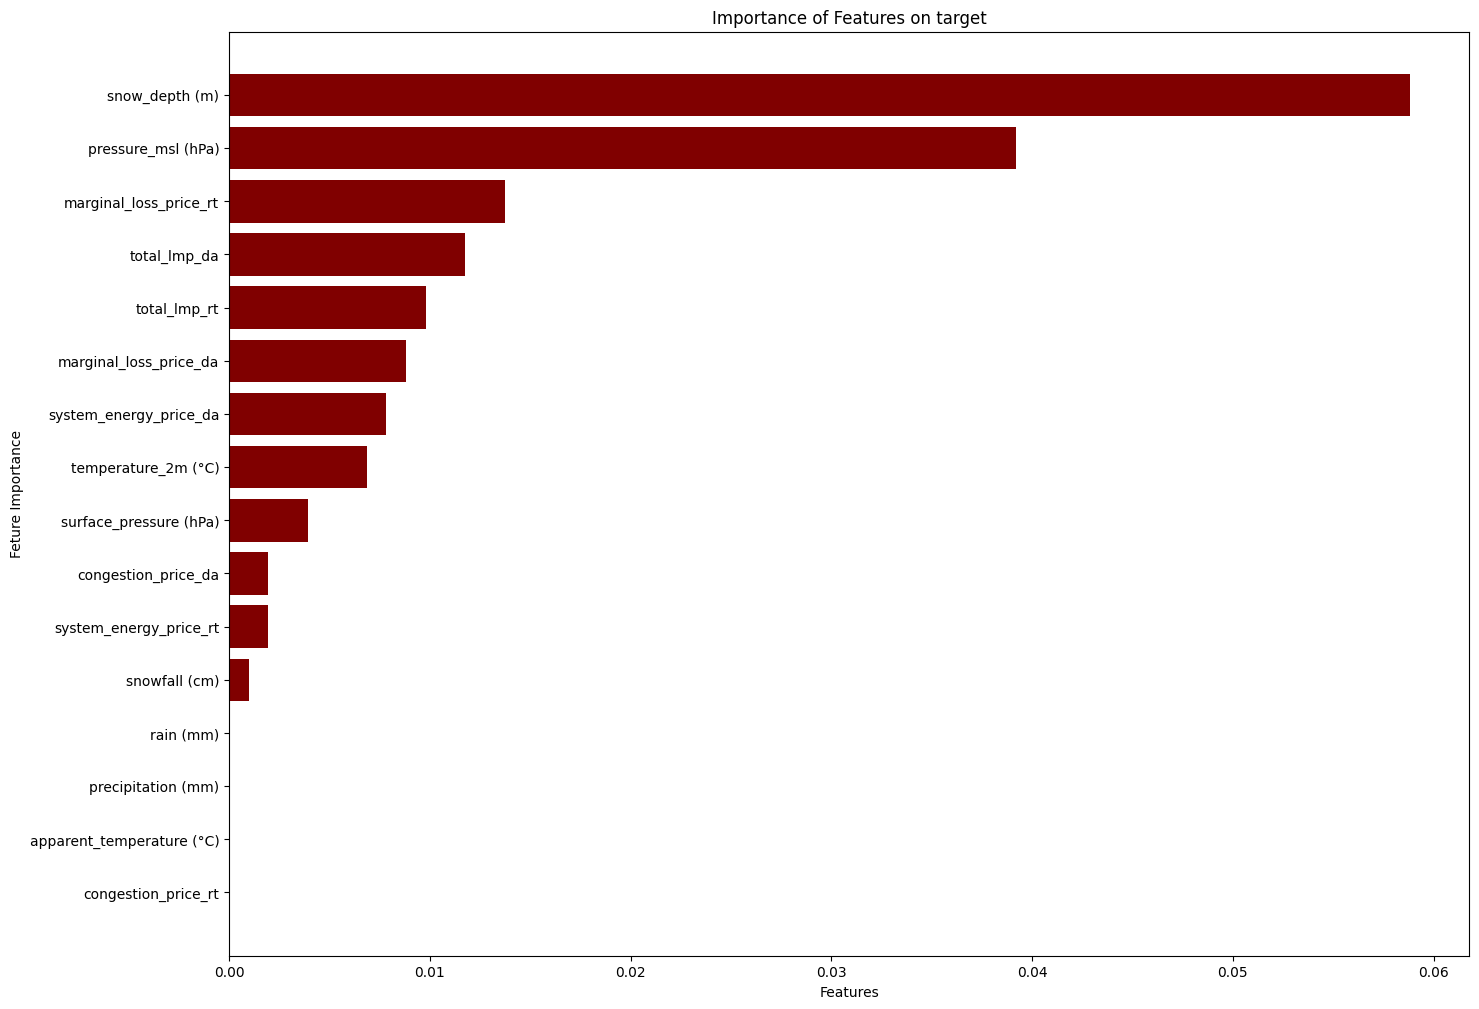

In [82]:
xgb_features = plot_features(XGBClassifier())

In [86]:
xgb_features = [i for i in list(xgb_features.keys()) if xgb_features[i] > 0]


scaler = StandardScaler()
scaler.fit(com[xgb_features])
X = scaler.transform(com[xgb_features])


X_train, X_test, y_train, y_test = train_test_split(X,com[outputs]["target_c"],test_size=0.2, shuffle=False)

xgb_params = {'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8}
rlf = XGBClassifier(**params)

rlf.fit(X_train,y_train)

trainResult = rlf.score(X_train,y_train)
testResult = rlf.score(X_test,y_test)
confusionMatrix = confusion_matrix(y_test, rlf.predict(X_test))

print("Training", trainResult)
print("Testing: ",testResult)
print()
print(confusionMatrix)

Training 0.8990196078431373
Testing:  0.95703125

[[245   0   0]
 [  5   0   0]
 [  6   0   0]]


In [90]:
# Since logistic regression is our strongest model, I will base the classifiers off it 

nn_features = []

for i in log_features:
    if (i in rlf_features) and (i in xgb_features )and (i in svc_features):
        nn_features.append(i)
    
print(nn_features)

['temperature_2m (°C)', 'marginal_loss_price_da', 'system_energy_price_rt', 'pressure_msl (hPa)', 'congestion_price_da', 'marginal_loss_price_rt', 'snowfall (cm)', 'surface_pressure (hPa)', 'total_lmp_da', 'system_energy_price_da', 'total_lmp_rt']


In [91]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(input_dim=X_train.shape[0],output_dim=64),
tf.keras.layers.LSTM(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(3) # 0, 1, 2 
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


model.compile(optimizer='adam',
            loss=loss_fn,
            metrics=['accuracy'],
            )

print(model)


scaler = StandardScaler()
scaler.fit(com[nn_features])
X = scaler.transform(com[nn_features])


X_train, X_test, y_train, y_test = train_test_split(X,com[outputs]["target_c"],test_size=0.2, shuffle=False)

history = model.fit(X_train, y_train, epochs=50, verbose=2)
test_results = model.evaluate(X_test, y_test, verbose=2)

<Sequential name=sequential_1, built=False>
Epoch 1/50
32/32 - 9s - 268ms/step - accuracy: 0.8559 - loss: 0.7118
Epoch 2/50
32/32 - 1s - 23ms/step - accuracy: 0.8863 - loss: 0.4738
Epoch 3/50
32/32 - 1s - 25ms/step - accuracy: 0.8863 - loss: 0.4379
Epoch 4/50
32/32 - 1s - 23ms/step - accuracy: 0.8863 - loss: 0.4423
Epoch 5/50
32/32 - 1s - 17ms/step - accuracy: 0.8863 - loss: 0.3969
Epoch 6/50
32/32 - 1s - 18ms/step - accuracy: 0.8863 - loss: 0.4013
Epoch 7/50
32/32 - 1s - 17ms/step - accuracy: 0.8863 - loss: 0.3872
Epoch 8/50
32/32 - 0s - 16ms/step - accuracy: 0.8882 - loss: 0.3848
Epoch 9/50
32/32 - 1s - 19ms/step - accuracy: 0.8882 - loss: 0.3921
Epoch 10/50
32/32 - 1s - 19ms/step - accuracy: 0.8873 - loss: 0.3880
Epoch 11/50
32/32 - 1s - 18ms/step - accuracy: 0.8892 - loss: 0.3742
Epoch 12/50
32/32 - 1s - 17ms/step - accuracy: 0.8931 - loss: 0.3728
Epoch 13/50
32/32 - 1s - 22ms/step - accuracy: 0.8912 - loss: 0.3654
Epoch 14/50
32/32 - 1s - 19ms/step - accuracy: 0.8863 - loss: 0.371

In [94]:
print(f"accuracy: {test_results[1]} - loss: {test_results[0]}")

accuracy: 0.953125 - loss: 0.2236357033252716


In [92]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

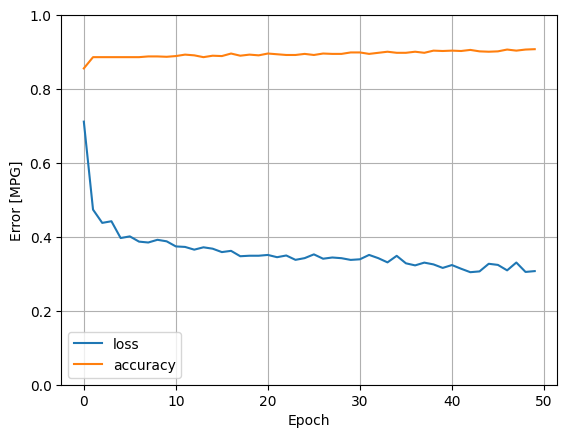

In [93]:
plot_loss(history)

In [ ]:
# Find Best params for select models
# Find best features for select models
# Find best ensemble model 
# Print results and conclusion 

8/8 - 1s - 68ms/step - accuracy: 0.8588 - loss: 0.8851


Index(['snow_depth (m)', 'pressure_msl (hPa)', 'marginal_loss_price_rt',
       'total_lmp_da', 'total_lmp_rt', 'marginal_loss_price_da',
       'system_energy_price_da', 'temperature_2m (°C)',
       'surface_pressure (hPa)', 'congestion_price_da',
       'system_energy_price_rt', 'snowfall (cm)'],
      dtype='object')

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier

In [113]:
svc_features

{'pressure_msl (hPa)': 0.013725490196078494,
 'snow_depth (m)': 0.012745098039215752,
 'temperature_2m (°C)': 0.009803921568627416,
 'system_energy_price_da': 0.008823529411764675,
 'surface_pressure (hPa)': 0.007843137254901933,
 'total_lmp_da': 0.007843137254901933,
 'total_lmp_rt': 0.00588235294117645,
 'marginal_loss_price_rt': 0.004901960784313708,
 'system_energy_price_rt': 0.004901960784313708,
 'snowfall (cm)': 0.0039215686274509665,
 'marginal_loss_price_da': 0.002941176470588225,
 'congestion_price_da': 0.0019607843137254832,
 'precipitation (mm)': 0.0009803921568627416,
 'rain (mm)': 0.0,
 'apparent_temperature (°C)': 0.0,
 'congestion_price_rt': 0.0}

In [122]:
xgb = XGBClassifier(**xgb_params)
rlf = RandomForestClassifier(**rlf_params)
log = LogisticRegression()
svc = SVC(C=0.01, probability=True)

xgb_features_index =com[xgb_features].columns
rlf_features_index = com[rlf_features].columns
log_features_index = com[log_features].columns
svc_features_index = com[svc_features].columns

xgb_pipeline = Pipeline([
    ("select", ColumnTransformer([("keep", "passthrough", xgb_features_index)])),
    ("scale",StandardScaler()),
    ("model",xgb)
])
rlf_pipeline = Pipeline([
    ("select", ColumnTransformer([("keep", "passthrough", rlf_features_index)])),
    ("scale",StandardScaler()),
    ("model",rlf)
])
log_pipeline = Pipeline([
    ("select", ColumnTransformer([("keep", "passthrough", log_features_index)])),
    ("scale",StandardScaler()),
    ("model",log)
])
svc_pipeline = Pipeline([
    ("select", ColumnTransformer([("keep", "passthrough", svc_features_index)])),
    ("scale",StandardScaler()),
    ("model",svc)
])

voting_clf = VotingClassifier(
    estimators=[("xgb", xgb_pipeline), ("rlf",rlf_pipeline), ("log", log_pipeline), ("svc", svc_pipeline)],
    voting="soft"
)

In [123]:
voting_clf

VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('select',
                                               ColumnTransformer(transformers=[('keep',
                                                                                'passthrough',
                                                                                Index(['snow_depth (m)', 'pressure_msl (hPa)', 'marginal_loss_price_rt',
       'total_lmp_da', 'total_lmp_rt', 'marginal_loss_price_da',
       'system_energy_price_da', 'temperature_2m (°C)',
       'surface_pressure (hPa)', 'congestion_price_da',
       'system_energy_pric...
                                                                                Index(['pressure_msl (hPa)', 'snow_depth (m)', 'temperature_2m (°C)',
       'system_energy_price_da', 'surface_pressure (hPa)', 'total_lmp_da',
       'total_lmp_rt', 'marginal_loss_price_rt', 'system_energy_price_rt',
       'snowfall (cm)', 'marginal_loss_price_da', 'congestion_price_da',
       'precipitation (mm)'],
      dtype='object'))])),
                                              ('scale', StandardScaler()),
                                              ('model',
                                               SVC(C=0.01,
                                                   probability=True))]))],
                 voting='soft')

In [124]:
X_train, X_test, y_train, y_test = train_test_split(com,com[outputs]["target_c"],test_size=0.2, shuffle=False)

In [125]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('select',
                                               ColumnTransformer(transformers=[('keep',
                                                                                'passthrough',
                                                                                Index(['snow_depth (m)', 'pressure_msl (hPa)', 'marginal_loss_price_rt',
       'total_lmp_da', 'total_lmp_rt', 'marginal_loss_price_da',
       'system_energy_price_da', 'temperature_2m (°C)',
       'surface_pressure (hPa)', 'congestion_price_da',
       'system_energy_pric...
                                                                                Index(['pressure_msl (hPa)', 'snow_depth (m)', 'temperature_2m (°C)',
       'system_energy_price_da', 'surface_pressure (hPa)', 'total_lmp_da',
       'total_lmp_rt', 'marginal_loss_price_rt', 'system_energy_price_rt',
       'snowfall (cm)', 'marginal_loss_price_da', 'congestion_price_da',
       'precipitation (mm)'],
      dtype='object'))])),
                                              ('scale', StandardScaler()),
                                              ('model',
                                               SVC(C=0.01,
                                                   probability=True))]))],
                 voting='soft')

In [126]:
trainResult = voting_clf.score(X_train,y_train)
testResult = voting_clf.score(X_test,y_test)
confusionMatrix = confusion_matrix(y_test, voting_clf.predict(X_test))

print("Training", trainResult)
print("Testing: ",testResult)
print()
print(confusionMatrix)

Training 0.9009803921568628
Testing:  0.95703125

[[245   0   0]
 [  5   0   0]
 [  6   0   0]]
